# ========================================

# Import Dependencies

# ========================================

In [1]:
# =========================================================
#          Python Library Installations for Colab
# =========================================================
! pip install splinter
# ---------------------------------------------------------
!pip install beautifulsoup4
# ---------------------------------------------------------
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 9.8MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/ubun

In [2]:
# =========================================================
#               Python Libraries for Colab
# =========================================================
import sys
# ---------------------------------------------------------
from google.colab import drive

In [3]:
# =========================================================
#               Mount Google Drive to Colab
# =========================================================
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# =========================================================
#               Import Python Libraries
# =========================================================
import os
# ---------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ---------------------------------------------------------
from splinter import Browser
# ---------------------------------------------------------
from bs4 import BeautifulSoup as BS
# ---------------------------------------------------------
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException 
# ---------------------------------------------------------
import urllib.request, urllib.error, urllib.parse
# ---------------------------------------------------------
from itertools import dropwhile
# ---------------------------------------------------------
import time
import datetime
from datetime import timedelta, date




# import warnings
# import pymongo
# import requests
# import datefinder

# ========================================

# URLs for the Websites

# ========================================

In [ ]:
# USGS_WaterWatch_url = "https://waterwatch.usgs.gov/index.php?id=wwdrought"

# +++++++++++++++++++++++++++++++++++++++

# ========================================

# Step 00 - Scrape the Tables from USGS' WaterWatch Retrieval Summary of 7-day Flow Conditions Using Pandas

This did not work b/c the table is created with JavaScript

# ========================================

In [ ]:
# # Importing the USGS' WaterWatch Retrieval Summary of 7-day Flow Conditions Websites
# River_Stream_7Day_Flow_Conditions_Tables = pd.read_html("https://waterwatch.usgs.gov/index.php?id=wwdrought")

In [ ]:
# len(River_Stream_7Day_Flow_Conditions_Tables)

In [ ]:
# River_Stream_7Day_Flow_Conditions_Tables[5]

# +++++++++++++++++++++++++++++++++++++++

# ========================================

# Step 2 - Scraping the Website with BeautifulSoup

# ========================================

## Scrape a webpage and create a BeautifulSoup object from the results

## 2.1 USGS' WaterWatch

### 2.1.1 Retrieve the data/information on USGS' WaterWatch website

# ========================================

# Step 1 - Scrape a Table of All the Streamflow Stations In Idaho by County, Save a CSV File with Daily Streamflow Data for Each Station, and Scrape a Table with Extended Streamflow Statistics for Each Streamflow Station

# ========================================

## Scrape a webpage and create a BeautifulSoup object from the results

## 1.1 Create the Driver

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [5]:
# from selenium import webdriver
# from selenium.webdriver.support.ui import Select

USGS_WaterWatch_url = "https://waterwatch.usgs.gov/index.php?id=wwdrought"

# driver = webdriver.Chrome()
# driver.get(USGS_WaterWatch_url)

In [23]:
options = webdriver.ChromeOptions()
options.add_argument("-headless")
options.add_argument("-no-sandbox")
options.add_argument("-disable-dev-shm-usage")

driver = webdriver.Chrome("chromedriver", options=options)
driver.get(USGS_WaterWatch_url)
# print(driver.page_source) # results

In [24]:
# https://stackoverflow.com/questions/12323403/how-do-i-find-an-element-that-contains-specific-text-in-selenium-webdriver-pyth
# https://selenium-python.readthedocs.io/locating-elements.html

driver.find_element_by_xpath("//*[contains(text(), 'Current Streamflow')]").click()

In [25]:
# https://stackoverflow.com/questions/52873433/python-selenium-clicking-based-on-alt-attribute

driver.find_element_by_css_selector('[alt="id"]').click()

In [26]:
# Press/Click a Button Without an ID
#     - https://stackoverflow.com/questions/8871654/how-to-press-click-the-button-using-selenium-if-the-button-does-not-have-the-id

lst_all_statns = '//input[@type="radio" and @value="statelist"]'

button = driver.find_element_by_xpath(lst_all_statns)
button.click()

In [27]:
# https://stackoverflow.com/questions/7867537/how-to-select-a-drop-down-menu-value-with-selenium-using-python

select = Select(driver.find_element_by_id('select_display'))

# Select by visible text
# select.select_by_visible_text('Daily Stage and Streamflow')

# Select by value text
select.select_by_value('dailystagedischarge')

In [28]:
# https://stackoverflow.com/questions/7867537/how-to-select-a-drop-down-menu-value-with-selenium-using-python

select = Select(driver.find_element_by_id('group_table_by'))

# Select by visible text
# select.select_by_visible_text('Daily Stage and Streamflow')

# Select by value text
select.select_by_value('county_cd')

In [29]:
# Press/Click a Button Without an ID
#     - https://stackoverflow.com/questions/8871654/how-to-press-click-the-button-using-selenium-if-the-button-does-not-have-the-id

sbmt_bttn = '//input[@type="submit" and @value="go"]'

button = driver.find_element_by_xpath(sbmt_bttn)
button.click()

In [ ]:
# Find All the Station Numbers Scrap the table with all the stations and use that table to loop 
# through and click each station's link.

In [30]:
crrnt_url = driver.current_url

In [31]:
# https://stackoverflow.com/questions/5041008/how-to-find-elements-by-class

statn_table = pd.read_html(crrnt_url)
print(f"Number of Tables on the current page: {len(statn_table)}")
statn_table[1]

Number of Tables on the current page: 3


,StationNumber,Station name,Dailymeangage height(ft)3/15,Dailymeanstream- flow (ft3/s)3/15
0,Ada County,Ada County,Ada County,Ada County
1,13206000,BOISE RIVER AT GLENWOOD BRIDGE NR BOISE ID,NaN,269
2,13206305,BOISE RIVER SOUTH CHANNEL AT EAGLE ID,NaN,242
3,13206400,"EAGLE DRAIN AT EAGLE, ID",NaN,6.18
4,Bannock County,Bannock County,Bannock County,Bannock County
...,...,...,...,...
271,13011500,"PACIFIC CREEK AT MORAN, WY",NaN,Ice
272,13011900,BUFFALO FORK AB LAVA CREEK NR MORAN WY,NaN,--
273,13013650,"SNAKE RIVER AT MOOSE, WY",NaN,1030
274,13015000,"GROS VENTRE RIVER AT ZENITH, WY",NaN,--


In [ ]:
# print(statn_table[1].dtypes)

In [32]:
statn_table_df = statn_table[1]

In [33]:
# Seperate the text from the digits in the "StationNumber" column.
# https://stackoverflow.com/questions/56851679/how-to-separate-pandas-column-that-contains-values-stored-as-text-and-numbers-in

statn_table_df_splt_StatnNmbr = statn_table_df.join(statn_table_df.pop('StationNumber').str.extract('(?P<numbers>\d+)?(?P<text>\D+)?').fillna(''))
statn_table_df_splt_StatnNmbr

,Station name,Dailymeangage height(ft)3/15,Dailymeanstream- flow (ft3/s)3/15,numbers,text
0,Ada County,Ada County,Ada County,,Ada County
1,BOISE RIVER AT GLENWOOD BRIDGE NR BOISE ID,NaN,269,13206000,
2,BOISE RIVER SOUTH CHANNEL AT EAGLE ID,NaN,242,13206305,
3,"EAGLE DRAIN AT EAGLE, ID",NaN,6.18,13206400,
4,Bannock County,Bannock County,Bannock County,,Bannock County
...,...,...,...,...,...
271,"PACIFIC CREEK AT MORAN, WY",NaN,Ice,13011500,
272,BUFFALO FORK AB LAVA CREEK NR MORAN WY,NaN,--,13011900,
273,"SNAKE RIVER AT MOOSE, WY",NaN,1030,13013650,
274,"GROS VENTRE RIVER AT ZENITH, WY",NaN,--,13015000,


In [ ]:
# Reference:
#     - How to: Select a range of rows of a DataFrame by index
#         - https://www.kite.com/python/examples/2805/pandas-select-a-range-of-rows-of-a-%60dataframe%60-by-index

statn_table_df_splt_StatnNmbr[213:221]

In [34]:
# This is to Drop the Row with an Index Number of 215 Because it's an Empty Row, See Above.
statn_table_df_splt_StatnNmbr = statn_table_df_splt_StatnNmbr.drop(215)
statn_table_df_splt_StatnNmbr = statn_table_df_splt_StatnNmbr.reset_index(drop = True)
statn_table_df_splt_StatnNmbr[213:221]

,Station name,Dailymeangage height(ft)3/15,Dailymeanstream- flow (ft3/s)3/15,numbers,text
213,Twin Falls County,Twin Falls County,Twin Falls County,,Twin Falls County
214,LOWER MILNER POWER PLANT AT MILNER ID,NaN,NaN,13087505,
215,SNAKE RIVER GAGING STATION AT MILNER ID,NaN,0.00,13087995,
216,SNAKE RIVER NR TWIN FALLS ID,NaN,366,13090500,
217,ROCK CREEK AB HWY 30/93 XING AT TWIN FALLS ID,NaN,39.6,13092747,
218,SNAKE RIVER NR BUHL ID,NaN,1390,13094000,
219,SALMON FALLS CREEK NR HAGERMAN ID,NaN,109,13108150,
220,Valley County,Valley County,Valley County,,Valley County


In [ ]:
# # NEW CELL

# if statn_table_df_splt_StatnNmbr["text"][1] == "":
#     print("No County")

In [35]:
# Create a dataframe with only the "numbers" column from the "statn_table_df_splt" Dataframe
statn_table_df_splt_StatnNmbr_nmbrs_clmn = pd.DataFrame(statn_table_df_splt_StatnNmbr["numbers"])

# Replace the Empty Rows with "NaN"
# https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

nan_value = float("NaN")
statn_table_df_splt_StatnNmbr_nmbrs_clmn.replace("", nan_value, inplace=True)

In [ ]:
# # Count the Number of Null Values in the Dataframe
# # https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

# statn_table_df_splt_StatnNmbr_nmbrs_clmn.isna().sum()

In [36]:
# Remove the "NaN" Null Values
statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls = statn_table_df_splt_StatnNmbr_nmbrs_clmn.dropna()
print(f"Number of Null Values: {statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls.isna().sum()}")
print("*********************************************************************************************************")
print(statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls.dtypes)

Number of Null Values: numbers    0
dtype: int64
*********************************************************************************************************
numbers    object
dtype: object


In [ ]:
# # Convert the "numbers" column to an Interger Data Type

# statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls["numbers"] = statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls["numbers"].astype(int)

# print(statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls.dtypes)

In [ ]:
# statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls.head()

In [20]:
bgn_date = "1997-01-01"
end_date = "2015-12-31"

In [21]:
# Reference:
#     - Checking if an Element Exist on a Webpage with Python Selenium
#         - https://stackoverflow.com/questions/9567069/checking-if-element-exists-with-python-selenium

def check_exists_by_xpath(xpath):
    try:
        select = Select(driver.find_element_by_id("select_data_1"))
        select.select_by_visible_text("Time-series:   Current/Historical Observations")
    except NoSuchElementException:
        return False
    return True

In [ ]:
# check_exists_by_xpath("https://waterdata.usgs.gov/id/nwis/uv/?site_no=13296000&agency_cd=USGS")

In [ ]:
# test = webContent.decode("utf-8")
# type(test)
# test

In [37]:
statn_table_df_splt_StatnNmbr_test = statn_table_df_splt_StatnNmbr

for row in statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls.index:
    
    # Find the Hyper Link for One Station
    statn_nmbr = statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls["numbers"][row]


    # https://stackoverflow.com/questions/32874539/using-a-variable-in-xpath-in-python-selenium
    # driver.find_element_by_xpath("//*[contains(text(), '13206000')]").click()
    driver.find_element_by_xpath("//*[contains(text(),'" +statn_nmbr+"')]").click()


    # Under Output Format Select the "Tab-separated" Output format
    lst_all_statns = '//input[@type="radio" and @value="rdb"]'

    lst_all_statns_button = driver.find_element_by_xpath(lst_all_statns)
    lst_all_statns_button.click()
#     time.sleep(5)

    # Enter Values for the Begin Date and End Date
    # Fill in Input Fills
    #     - https://stackoverflow.com/questions/25537567/how-to-open-website-and-fill-in-input-using-selenium-webdriver
    # Clear the Input Field
    #     - http://10minbasics.com/clear-fill-input-field-with-selenium/

    element = driver.find_element_by_name("begin_date")
    element.clear()
    element.send_keys(bgn_date)

    element = driver.find_element_by_name("end_date")
    element.clear()
    element.send_keys(end_date)
    

    # Press/Click a Button Without an ID
    #     - https://stackoverflow.com/questions/8871654/how-to-press-click-the-button-using-selenium-if-the-button-does-not-have-the-id
    #     - https://stackoverflow.com/questions/21322116/using-selenium-in-python-to-click-select-a-radio-button/21322160

    sbmt_bttn = '//input[@id="go_available_button"]'

    sbmt_bttn_button = driver.find_element_by_xpath(sbmt_bttn)
    sbmt_bttn_button.click()
#     time.sleep(5)


#     from selenium.webdriver import ActionChains

    actionChains = ActionChains(driver)


    # Save the data file to This Computer

    # How to Open and Write to a File on This Computer
    #     - https://programminghistorian.org/en/lessons/working-with-web-pages
    # How to Change the Location of the File
    #     - https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python_FileText.html

#     import urllib.request, urllib.error, urllib.parse
#     import os


    response = urllib.request.urlopen(driver.current_url)
    webContent_bytes = response.read()
    webContent_str = webContent_bytes.decode("utf-8")


    fle_nm = "/content/gdrive/My Drive/Colab_Notebooks/USGS_Idaho_Water_Watch_Data/" + statn_nmbr + ".txt"

    f = open(fle_nm, 'w')
    f.write(webContent_str)
    f.close

# Go back to the original URL for the station
    driver.back()
    time.sleep(2)
# ================================================================================================   
# This isn't Working Because Some of the Stations do not have a "Time-series: Current/Historical 
# Observations" In the "Available Data for this Site" Dropdown List Box
# ------------------------------------------------------------------------------------------------
# # Select the "Time-series: Current/Historical Observations" from the dropdown list, this will 
# # create page which includes a table with extended streamflow statistics.

    crrnt_url = driver.current_url

    if check_exists_by_xpath(crrnt_url):
        crrnt_hstrcl_obsrvtns = '//input[@value="uv"]'

        select = Select(driver.find_element_by_id("select_data_1"))
        select.select_by_visible_text("Time-series:   Current/Historical Observations")
# ================================================================================================

# ================================================================================================
# Instead of Using the "Time-series: Current/Historical Observations", I decided to Use the 
# "Time-series:   Daily data" for the Extended Mean. I do not Need to Select anything in the
# "Available Data for this Site" Dropdown List Box.
# ------------------------------------------------------------------------------------------------
# Under Output Format Select the "Tab-separated" Output format
    else:
        statn_grph_stats = '//input[@type="radio" and @value="gif_stats"]'

        statn_grph_stats_button = driver.find_element_by_xpath(statn_grph_stats)
        statn_grph_stats_button.click()

        sbmt_bttn = '//input[@id="go_available_button"]'

        sbmt_bttn_button = driver.find_element_by_xpath(sbmt_bttn)
        sbmt_bttn_button.click()

# ================================================================================================    
    
# Get the extended year streamflow min, max, median, mean, 25th percentile, and 75th percentile
    # https://stackoverflow.com/questions/5041008/how-to-find-elements-by-class
    
    crrnt_hstrcl_obsrvtns_url = driver.current_url
    crrnt_hstrcl_obsrvtns_html = pd.read_html(crrnt_hstrcl_obsrvtns_url)
    print(f'Station Number: {statn_nmbr}')
    print(f"Number of Tables on the current page: {len(crrnt_hstrcl_obsrvtns_html)}")
#     print(type(crrnt_hstrcl_obsrvtns_html[1]))
    
    if len(crrnt_hstrcl_obsrvtns_html) == 2:
        
#         print(crrnt_hstrcl_obsrvtns_html[1])

        extndd_yrs_sttstcs = crrnt_hstrcl_obsrvtns_html[1]


        # Reference: 
    #     - Find column whose name contains a specific string:
    #         - https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string

    # print(extndd_yrs_sttstcs.columns)
        extndd_yrs_sttstcs_cols = [col_nm for col_nm in extndd_yrs_sttstcs.columns if 'Min' in col_nm]
        min_strmflw = extndd_yrs_sttstcs_cols[0]
#         print(f'Min Flow: {min_strmflw}')

        extndd_yrs_sttstcs_cols = [col_nm for col_nm in extndd_yrs_sttstcs.columns if 'Max' in col_nm]
        max_strmflw = extndd_yrs_sttstcs_cols[0]
#         print(f'Max Flow: {max_strmflw}')

#         extndd_yrs_sttstcs_cols = [col_nm for col_nm in extndd_yrs_sttstcs.columns if '25th' in col_nm]
#         _25th_prcntle_strmflw = extndd_yrs_sttstcs_cols[0]
# #         print(f'25th_prcntle: {_25th_prcntle_strmflw}')

#         extndd_yrs_sttstcs_cols = [col_nm for col_nm in extndd_yrs_sttstcs.columns if '75th' in col_nm]
#         _75th_prcntle_strmflw = extndd_yrs_sttstcs_cols[0]
# #         print(f'75th_prcntle: {_75th_prcntle_strmflw}')



            # References:
        #     - Return the Index label if some condition is satisfied over a column in Pandas Dataframe:
        #         - geeksforgeeks.org/return-the-index-label-if-some-condition-is-satisfied-over-a-column-in-pandas-dataframe/
        #     - Pandas update a cell:
        #         - https://kanoki.org/2019/04/12/pandas-how-to-get-a-cell-value-and-update-it/


        # Find the Index for the Station  
        indx_lbl = statn_table_df_splt_StatnNmbr[statn_table_df_splt_StatnNmbr["numbers"] == statn_nmbr].index.tolist()
        print(f'Index No: {indx_lbl[0]}')

        # Append the Extened Water Years Average to the "statn_table_df_splt_StatnNmbr_nmbrs_clmn_no_nulls"
        # Dataframe
    # #     statn_table_df_splt_StatnNmbr_test = statn_table_df_splt_StatnNmbr.append({"extndd_yrs_min": indx_lbl}, ignore_index=True)
        statn_table_df_splt_StatnNmbr_test.at[indx_lbl[0], "extndd_yrs_min"] = extndd_yrs_sttstcs[min_strmflw][0]

    #     statn_table_df_splt_StatnNmbr_test = statn_table_df_splt_StatnNmbr.append({"extndd_yrs_max": indx_lbl}, ignore_index=True)
        statn_table_df_splt_StatnNmbr_test.at[indx_lbl[0], "extndd_yrs_max"] = extndd_yrs_sttstcs[max_strmflw][0]

    #     statn_table_df_splt_StatnNmbr_test = statn_table_df_splt_StatnNmbr.append({"extndd_yrs_median": indx_lbl}, ignore_index=True)
        statn_table_df_splt_StatnNmbr_test.at[indx_lbl[0], "extndd_yrs_median"] = extndd_yrs_sttstcs["Median"][0]

    #     statn_table_df_splt_StatnNmbr_test = statn_table_df_splt_StatnNmbr.append({"extndd_yrs_mean": indx_lbl}, ignore_index=True)
        statn_table_df_splt_StatnNmbr_test.at[indx_lbl[0], "extndd_yrs_mean"] = extndd_yrs_sttstcs["Mean"][0]

#     #     statn_table_df_splt_StatnNmbr_test = statn_table_df_splt_StatnNmbr.append({"25th_prcntle": indx_lbl}, ignore_index=True)
#         statn_table_df_splt_StatnNmbr_test.at[indx_lbl[0], "25th_prcntle"] = extndd_yrs_sttstcs[_25th_prcntle_strmflw][0]

#     #     statn_table_df_splt_StatnNmbr_test = statn_table_df_splt_StatnNmbr.append({"75th_prcntle": indx_lbl}, ignore_index=True)
#         statn_table_df_splt_StatnNmbr_test.at[indx_lbl[0], "75th_prcntle"] = extndd_yrs_sttstcs[_75th_prcntle_strmflw][0]
    
    elif len(crrnt_hstrcl_obsrvtns_html) < 2:
        print("No Extened Water Statistics")
    
    print("********************************************************************************")
    
# Go back to the URL with the list of Stations and Counties
    driver.back()
    driver.back()
    
driver.close()

Station Number: 13206000
Number of Tables on the current page: 2
Index No: 1
********************************************************************************
Station Number: 13206305
Number of Tables on the current page: 2
Index No: 2
********************************************************************************
Station Number: 13206400
Number of Tables on the current page: 2
Index No: 3
********************************************************************************
Station Number: 13073000
Number of Tables on the current page: 2
Index No: 5
********************************************************************************
Station Number: 13075000
Number of Tables on the current page: 2
Index No: 6
********************************************************************************
Station Number: 13075500
Number of Tables on the current page: 2
Index No: 7
********************************************************************************
Station Number: 13075910
Number of Tables on the cur

In [ ]:
# extndd_yrs_sttstcs_cols

In [ ]:
# statn_table_df_splt_StatnNmbr_test.head(7)

In [38]:
# Create Dataframe for the county and each day

# Reference:
#     - How to Drop Empty Rows from a Dataframe
#         - https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

cnty_date_df = statn_table_df_splt_StatnNmbr_test[["text"]]
print(type(cnty_date_df))
cnty_date_df.replace("", nan_value, inplace = True)
cnty_date_df = cnty_date_df.dropna(how = "any")
cnty_date_df = cnty_date_df.reset_index(drop = True)
cnty_date_df = cnty_date_df.rename(columns = {"text": "idaho_counties"})
cnty_date_df

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,idaho_counties
0,Ada County
1,Bannock County
2,Bear Lake County
3,Benewah County
4,Bingham County
5,Blaine County
6,Boise County
7,Bonner County
8,Bonneville County
9,Boundary County


# ========================================

# Step 2 - Create a Dataframe for Each Station

# ========================================

## Scrape a webpage and create a BeautifulSoup object from the results

## 2.1 USGS' Science for a Changing World

In [39]:
# The function to Skip All of the Commented Lines in the File
#     https://cmdlinetips.com/2018/01/3-ways-to-read-a-file-and-skip-initial-comments-in-python/

def is_comment(s):
    """ function to check if a line
         starts with some character.
         Here # for comment
    """
    # return true if a line starts with #
    return s.startswith('#')

In [40]:
# Column Names for the Dataframe
clmn_nms = ["agency", 
            "site_nmbr", 
            "date", 
            "streamflow_rate", 
            "approved/pending"]

In [ ]:
# # File Path for the Streamflow Data
# input_fle_path = os.path.join("Data", "Idaho_Streamflow_Data")

In [41]:
# Dictionary of Data Types to Change in the Dataframe
convert_dict = {
                "streamflow_rate": float
               } 

In [ ]:
# # List of Files in a Directory
# #     - https://careerkarma.com/blog/python-list-files-in-directory/

# input_fle_lst = os.listdir(input_fle_path)
# print(input_fle_lst)
# # input_fle_nm = input_fle_lst[0]
# # print(input_fle_nm)

In [ ]:
# # How to Ignore Hidden Files
# #     - https://stackoverflow.com/questions/15235823/how-to-ignore-hidden-files-in-python-functions

# # Create a Dictionary of List from the Files in the Directory
# input_fle_dict = {"Station_Nmbr":[], "File_Name": [], "df_Name": []}

# for input_fle_nm in input_fle_lst:
# #     Skipping the Files that Start With "."
#     if not input_fle_nm.startswith('.') and os.path.isfile(os.path.join(input_fle_path, input_fle_nm)):

# # Append to the Station Numbers and File Names and create and append the Dataframe Name to the 
# # Directory
#         input_fle_dict["Station_Nmbr"].append(input_fle_nm[:-4])
#         input_fle_dict["File_Name"].append(input_fle_nm)
#         input_fle_dict["df_Name"].append("_" + input_fle_nm[:-4] + "_df")
# #         print(input_fle_nm)

In [ ]:
# input_fle_dict

In [ ]:
# statn_table_df_splt_StatnNmbr.head()

# # The Last Index Value in the "text" Column
# lst_row_text_clmn = statn_table_df_splt_StatnNmbr["text"].last_valid_index()
# lst_row_text_clmn

In [ ]:
# statn_table_df_splt_StatnNmbr[213:221]
# statn_table_df_splt_StatnNmbr.tail()

In [42]:
# Create a List of the Counties
cnty_lst = []

count_1 = 0
count_2 = 0
count_3 = 0

# Create a List of the Stations
# statn_lst = []
# cnty_lst = [[] * 154]
new_dict = {}

# The "text" Column is the County Name
for row in statn_table_df_splt_StatnNmbr["text"]:
#     print(row)
 
#     If this count is <= the Last Row in the "text" Column
    if count_1 + 1 < 275:
# *********************************************************************************************
#                               Step 1: If the row is Not Empty
# *********************************************************************************************
        if row != "":
            # Create a List of the Stations
            statn_lst = []  # This will be a list of dictionaries
            cnty_nm = row
#         print(row)
# #         count_1 = count_1
#         cnty_lst[count_2].append(row)
#         cnty_lst[count_2].append([])
# *********************************************************************************************


# *********************************************************************************************
#                   Step 2: If the row is Empty and the Next Row is Empty
# *********************************************************************************************

        elif row == "" and statn_table_df_splt_StatnNmbr["text"][count_1 + 1] == "":
#         print(statn_table_df_splt_StatnNmbr["numbers"][count_1]) 
#         cnty_lst[count_2][1].append(statn_table_df_splt_StatnNmbr["numbers"][count_1])
        
        
# # #         print(statn_table_df_splt_StatnNmbr["numbers"][count])
# # #         count_3 = count_1
# # #         print (count_3)
# #         count_1 = 0


            new_dict = {"Station_Nmbr": statn_table_df_splt_StatnNmbr["numbers"][count_1], 
                        "File_Name":statn_table_df_splt_StatnNmbr["numbers"][count_1] + ".txt", #input_fle_nm, 
                        "df_Name": statn_table_df_splt_StatnNmbr["numbers"][count_1] + "_df",#"_" + input_fle_nm[:-4] + "_df", 
                        "Data": "", 
                        "Avg_Streamflow": "",
                        "Prcnt_Below_Avg": ""}
    
            statn_lst.append(dict(new_dict))
# *********************************************************************************************


# *********************************************************************************************
#                   Step 3: If the row is Empty and the Next Row is Not Empty
# *********************************************************************************************
        elif row == "": #and statn_table_df_splt_StatnNmbr["text"][count_1 + 1] != "":
#         cnty_lst[count_2][1].append(statn_table_df_splt_StatnNmbr["numbers"][count_1])
        
            new_dict = {"Station_Nmbr": statn_table_df_splt_StatnNmbr["numbers"][count_1], 
                        "File_Name":statn_table_df_splt_StatnNmbr["numbers"][count_1] + ".txt", 
                        "df_Name": statn_table_df_splt_StatnNmbr["numbers"][count_1] + "_df",
                        "Data": "", 
                        "Avg_Streamflow": "",
                        "Prcnt_Below_Avg": ""}
    
            statn_lst.append(dict(new_dict))
        
#         count_2 = count_2 + 1
        
            cnty_lst.append(dict({cnty_nm: statn_lst}))
        
# *********************************************************************************************


# *********************************************************************************************
#                   Step 3: If the row is Empty and the Next Row is Not Empty
# *********************************************************************************************  
    if count_1 + 1 > 274 and row == "":
        print (count_1)



# *********************************************************************************************
#                   Step 3: If the row is Empty and the Next Row is Not Empty
# *********************************************************************************************
        
        new_dict = {"Station_Nmbr": statn_table_df_splt_StatnNmbr["numbers"][count_1], 
                    "File_Name":statn_table_df_splt_StatnNmbr["numbers"][count_1] + ".txt", 
                    "df_Name": statn_table_df_splt_StatnNmbr["numbers"][count_1] + "_df",
                    "Data": "", 
                    "Avg_Streamflow": "",
                    "Prcnt_Below_Avg": ""}

        statn_lst.append(dict(new_dict))

        cnty_lst.append(dict({cnty_nm: statn_lst}))
# *********************************************************************************************
    
    
# *********************************************************************************************
#                               Step 4: Add 1 to the Count
# *********************************************************************************************    
    count_1 = count_1 + 1
# *********************************************************************************************
    

274


In [ ]:
# import pprint
# pprint.pprint(cnty_lst)

In [ ]:
# # statn_lst
# # cnty_lst = {cnty_nm: statn_lst}
# # cnty_lst[0][0].append(input_fle_dict)
# # cnty_lst[0][1].append("test")
# # pprint.pprint(cnty_lst)
# # print("********************************************************************")
# # print(new_dict)
# # print(statn_lst)
# pprint.pprint(cnty_lst[0])
# # pprint.pprint(cnty_lst[50])
# print("********************************************************************")
# pprint.pprint(cnty_lst[0]["Ada County"])
# # pprint.pprint(cnty_lst[50]["Teton County, Wyoming"])
# print("********************************************************************")
# pprint.pprint(cnty_lst[0]["Ada County"][0])
# # pprint.pprint(cnty_lst[50]["Teton County, Wyoming"][0])
# print("********************************************************************")
# pprint.pprint(cnty_lst[0]["Ada County"][0]["Station_Nmbr"])
# # pprint.pprint(cnty_lst[50]["Teton County, Wyoming"][0]["Station_Nmbr"])
# print("********************************************************************")
# pprint.pprint(cnty_lst[0]["Ada County"][0]["Data"]["date"])
# # pprint.pprint(cnty_lst[50]["Teton County, Wyoming"][0]["Station_Nmbr"])

In [ ]:
# # https://www.geeksforgeeks.org/python-get-dictionary-keys-as-a-list/

# print(cnty_lst[0].keys())
# print("********************************************************************")
# print(cnty_lst[0]["Ada County"][0].keys())

#### def find(name, path):
for root, dirs, files in os.walk(input_fle_path):
    if "13073000.txt" in files:
        print (os.path.join(root, "13073000.txt"))

In [ ]:
# def find_all("13073000.txt", input_fle_path):
#     result = []
#     for root, dirs, files in os.walk(input_fle_path):
#         if name in files:
#             result.append(os.path.join(root, name))
#     return result

In [ ]:
# # How to Ignore Hidden Files
# #     - https://stackoverflow.com/questions/15235823/how-to-ignore-hidden-files-in-python-functions

# # # *********************************************************************************************
# # # Create a List of the Files in the Directory
# # input_fle_dict = {"Station_Nmbr":[], "File_Name": [], "df_Name": [], "Data": [], "Avg_Streamflow": []}
# # # *********************************************************************************************

# # Create a List to Store/Save the Streamflow Data, Data will be Saved as a List of Dictionaries
# statn_data_lst_of_dicts = []
# input_fle_dict = {}



# # # *********************************************************************************************
# # Put the Station in a list by County Name
# # First Find the station in the county  

# if statn_table_df_splt_StatnNmbr["text"][1] == "":
#     print("No County")
# # # *********************************************************************************************



# for input_fle_nm in os.listdir(input_fle_path):
# # Skip the Hidden Files in the Directory
#     if not input_fle_nm.startswith('.') and os.path.isfile(os.path.join(input_fle_path, input_fle_nm)):
# # # *********************************************************************************************
# # #         Append to the File Names to the Directory
# #         input_fle_dict["Station_Nmbr"].append(input_fle_nm[:-4])
# #         input_fle_dict["File_Name"].append(input_fle_nm)
# #         input_fle_dict["df_Name"].append("_" + input_fle_nm[:-4] + "_df")
# #         input_fle_dict["df_Name"].append("_" + input_fle_nm[:-4] + "_df")
# # #         print(input_fle_nm)
# # # *********************************************************************************************


#         input_fle_dict = {"Station_Nmbr": input_fle_nm[:-4], 
#                           "File_Name": input_fle_nm, 
#                           "df_Name": "_" + input_fle_nm[:-4] + "_df", 
#                           "Data": "", 
#                           "Avg_Streamflow": "",
#                           "Prcnt_Below_Avg": ""}

# # Append to the File Names to the Directory
#     statn_data_lst_of_dicts.append(dict(input_fle_dict))


In [ ]:
# # https://note.nkmk.me/en/python-list-clear-pop-remove-del/#:~:text=In%20Python%2C%20use%20list%20methods,with%20an%20index%20or%20slice.

# statn_data_lst_of_dicts
# # del statn_data_lst_of_dicts[0]
# # statn_data_lst_of_dicts

In [ ]:
# statn_data_lst_of_dicts[1]['Station_Nmbr']

In [ ]:
# # for i, station in enumerate(dict_nm[key]):
# for i, a_dict in enumerate(statn_data_lst_of_dicts):
#     print(statn_data_lst_of_dicts[i]['File_Name'])

In [ ]:
# county = list(a_dict.keys())
# type(county)
# county[0]

In [ ]:
# a_series = pd.Series(data = [0,1,2,3,4], index = ["agency", "site_nmbr", "date", "streamflow_rate", "approved/pending"])
# a_series
# statn_data_lst_of_dicts
# a_dict

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
import pprint
pprint.pprint(cnty_lst)

In [43]:
# =============================================================================================================================
                          # Trying to Fix The VALUE ERROR MESSAGE: Cannot Convert to String to Float
# =============================================================================================================================

# Reference:
#   - Checking if a string can be converted to float in Python
#     - https://stackoverflow.com/questions/736043/checking-if-a-string-can-be-converted-to-float-in-python



# df.applymap(np.isreal)
# print(df.dtypes)
# # type(df)
# df = df.astype(convert_dict)
# print(df.dtypes)

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

# row = "4"

# isfloat(row)

# for row in df["streamflow_rate"]:
#   if isfloat(row) == False:
#     print(row)

In [44]:
# References:
#     - Break a Loop:
#         - https://www.programiz.com/python-programming/break-continue

# for i, station in enumerate(dict_nm[key]):

# *********************************************************************************************
#                           Step 1 Loop Through Each County 
# *********************************************************************************************

statns_wth_no_strmflw_data = []

for i, county_dict in enumerate(cnty_lst):
    print(f"Index No: {i}")
# Get dictionary keys as a list
# https://www.geeksforgeeks.org/python-get-dictionary-keys-as-a-list/
    county_lst = list(county_dict.keys())
    county = county_lst[0]
    print(f"County: {county}")
#     print(f"Stations:")

# *********************************************************************************************
#                    Step 2 Loop Through Each Station Within a County
# *********************************************************************************************
# 
    for station_dict in county_dict[county]:
        station_lst_keys = list(station_dict.keys())
        station_lst_File_Name = station_lst_keys[1]
        station_lst_data = station_lst_keys[3]
#         print(station_lst_keys)
#         print(station_lst_File_Name)
#         print(station_lst)
        print(f"Stations:{station_dict[station_lst_File_Name]}")
#     pprint.pprint(a_dict[county])

# *********************************************************************************************
#                   Step 3 - Create the File Path for the Stream Data
# *********************************************************************************************

# Create the File Path for Each Station's .txt File Which Includes Streamflow Data
        input_fle_path_fr_lp = "/content/gdrive/My Drive/Colab_Notebooks/USGS_Idaho_Water_Watch_Data/" + station_dict[station_lst_File_Name]
        # print(f"File Path: {input_fle_path_fr_lp}")
        # print("----------------------------------------------------")
        
# Create the Dataframe to Store the Streamflow Data from the .txt File
        df = pd.DataFrame(columns = clmn_nms)

# *********************************************************************************************
#             Step 4 - Loop Through the .txt File and Store the Data into a Dataframe
# *********************************************************************************************

# Loop Through the .txt File and Store the Data into a Dataframe
        with open(input_fle_path_fr_lp,'r') as fh:
            # print(fh)
            # print("----------------------------------------------------")
            for curline in dropwhile(is_comment, fh):
#                 print(f"Curline:")
#                 print(type(curline))
#                 print("----------------------------------------------------")
    #         print(f"Index Number: {count} {curline}")
    #         count = count + 1

    # Split a String
    #     - https://www.geeksforgeeks.org/python-string-split/
    # Pandas Series
    #     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
                to_append = curline[:-1].split("\t")
                # print(f"To Append: {to_append}")
#                 print(to_append)
# #                 print(to_append[4])
#                 print("----------------------------------------------------")
                
                if len(to_append) == 5:
#                     print("True")
            
                    a_series = pd.Series(data = to_append, index = clmn_nms)
#                     print(clmn_nms)
                    # print(f"Series: {a_series}")
#                     print(a_series)
                    # print("----------------------------------------------------")
                    
                        #             Dataframe
    #             Dataframe Name
#                     statn_nm = input_fle_nm[:-4]

    #             Append Data to the Dataframe
                    df= df.append(a_series, ignore_index=True)

                    
            
                elif len(to_append) < 5:
                    statns_wth_no_strmflw_data.append(station_dict[station_lst_File_Name])
                    break
#                     print(f"Station {station_dict[station_lst_File_Name]} Does not ")
                    
#     #             Dataframe
#     #             Dataframe Name
#                 statn_nm = input_fle_nm[:-4]
            # print(df)
        if len(df) != 0:
# Delete the first 2 Rows of the Dataframe Because they are not Data
            df = df.drop(index = [0, 1])
# Reset the Index so that it Starts with 0
            df = df.reset_index(drop = True)
# Change the Data Types of Each Column

# References:
#   - How to get rows/index names in Pandas dataframe
#     - https://www.geeksforgeeks.org/how-to-get-rows-index-names-in-pandas-dataframe/

            for i in df.index:
              streamflow_rate_value = df["streamflow_rate"][i]
# *********************************************************************************************
#                                 This Takes Care of the NaN
# *********************************************************************************************
# If the variable "streamflow_rate_values" comes back False that means the row is a string, 
# therefore it can not be convert to a float datatype. The empty rows are being filled with the
# previous days streamflow value. This is needed for other calculations futher on in this notebook. 
# *********************************************************************************************
# *********************************************************************************************
              if isfloat(streamflow_rate_value) == False:
                prev_i = i - 1
                df["streamflow_rate"][i] = df["streamflow_rate"][prev_i]
                # print(row)
            df = df.astype(convert_dict)
# Change the Date Column to a datetime Data Type
            df['date']= pd.to_datetime(df['date'])

# Calculate the Averge Streamflow Rate for the Station
            avg_strmflw = df["streamflow_rate"].median(axis = 0)
            avg_strmflw = statn_table_df_splt_StatnNmbr_test["extndd_yrs_mean"]
            # print(f"Average Streamflow: {avg_strmflw}")
    
# #     #             Append Data to the Dataframe           
# #             print(df)
            station_dict[station_lst_data] = df
#             # print(f"Data:{station_dict[station_lst_data]}")
#             # print("----------------------------------------------------")
            
    print("********************************************************************")

Index No: 0
County: Ada County
Stations:13206000.txt
Stations:13206305.txt
Stations:13206400.txt
********************************************************************
Index No: 1
County: Bannock County
Stations:13073000.txt
Stations:13075000.txt
Stations:13075500.txt
Stations:13075910.txt
********************************************************************
Index No: 2
County: Bear Lake County
Stations:10039500.txt
Stations:10068500.txt
********************************************************************
Index No: 3
County: Benewah County
Stations:12414900.txt
Stations:12415070.txt
Stations:12415135.txt
********************************************************************
Index No: 4
County: Bingham County
Stations:13060000.txt
Stations:13062500.txt
Stations:13065500.txt
Stations:13066000.txt
Stations:13068300.txt
Stations:13068495.txt
Stations:13068500.txt
Stations:13069500.txt
Stations:13075983.txt
********************************************************************
Index No: 5
County: 

In [ ]:
# =============================================================================================================================
                          # Trying to Fix The VALUE ERROR MESSAGE: Cannot Convert to String to Float
# =============================================================================================================================


# pprint.pprint(cnty_lst[1]["Bannock County"][3])
# pprint.pprint(cnty_lst[1]["Bannock County"][3]["File_Name"])
# print("---------------------------------------------------------------------------")

station_File_Name = "13075910.txt"

input_fle_path_fr_lp = "/content/gdrive/My Drive/Colab_Notebooks/USGS_Idaho_Water_Watch_Data/" + station_File_Name
# print(f"File Path: {input_fle_path_fr_lp}")

with open(input_fle_path_fr_lp,'r') as fh:
  # print(fh)
  # print("----------------------------------------------------")
  for curline in dropwhile(is_comment, fh):
    # print(f"Curline: {curline}")
    # print(type(curline))
    # print("----------------------------------------------------")
    # print(f"Index Number: {count} {curline}")

    to_append = curline[:-1].split("\t")
    # print(f"To Append: {to_append}")
#                 print(to_append)
# #                 print(to_append[4])
    # print("----------------------------------------------------")


    if len(to_append) == 5:
      # print("True")
      # print("----------------------------------------------------")

      a_series = pd.Series(data = to_append, index = clmn_nms)
#                     print(clmn_nms)
#                     print("Series:")
#                     print(a_series)
#                     print("----------------------------------------------------")
    
        #             Dataframe
#             Dataframe Name
#                     statn_nm = input_fle_nm[:-4]

#             Append Data to the Dataframe
      df = df.append(a_series, ignore_index=True)

    

    elif len(to_append) < 5:
      print("FALSE")
      print(f"To Append: {to_append}")
      print("----------------------------------------------------")
      statns_wth_no_strmflw_data.append(station_dict[station_lst_File_Name])
      break
#                     print(f"Station {station_dict[station_lst_File_Name]} Does not ")
df

In [ ]:
# print(df.dtypes)
# df = df.astype(convert_dict)

In [ ]:
# statns_wth_no_strmflw_data

In [ ]:
# type(cnty_lst[0]["Ada County"][1]["Data"])
# cnty_lst

In [45]:
def division_exception_handeling(divisor, dividend):
    try:
        return divisor/dividend
    except ZeroDivisionError:
        return 0


# number1 = 0
# number2 = 0
# division_exception_handeling(5, 10)
# self.divided = self.number1/(self.number2 or not self.number2)

In [46]:
# Refernces:
#     - Get a list of dates between two dates
#         - https://www.w3resource.com/python-exercises/date-time-exercise/python-date-time-exercise-50.php
#     - Check if a variable is string
#         - https://www.geeksforgeeks.org/python-check-if-a-variable-is-string/

# This is Converting the Date String into a Datetime Data Type
bgn_date_datetime = datetime.datetime.strptime(bgn_date, '%Y-%m-%d')
end_date_datetime = datetime.datetime.strptime(end_date, '%Y-%m-%d')

statns_withot_data = []

# Create Dataframe for the county and each day
# cnty_date_df = pd.DataFrame()

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

# print(type(end_dt_datetime ))

# *********************************************************************************************
#                                 Step 1 Loop Through Each Date
# *********************************************************************************************

for dt in daterange(bgn_date_datetime, end_date_datetime):
    srch_date = dt.strftime("%Y-%m-%d")
#     print(type(dt))
# This is Converting the Datetime Data Type into a String Data Type
    print("====================================================")
    print("****************************************************")
    print("====================================================")
    # print("****************************************************")
    print(dt.strftime("%Y-%m-%d")) # This is a String
    dly_strmflw_ttl = 0

# Create the Dataframe to Store the Streamflow Data from the .txt File
    srch_day_df = pd.DataFrame()
#     cnty_date_df[srch_date] = ""
    cnty_date_df[srch_date + "_ttl_strmflw"] = ""
    cnty_date_df[srch_date + "_cnty_prcnt_blw_extndd_avg"] = ""
    cnty_date_df[srch_date + "wghtd__prcnt_blw_extndd_avg"] = "" 
#     date_cnty_df_clmn_headr_nms.append(srch_date)
#     date_cnty_df_rows
    
    
# *********************************************************************************************
#                               Step 2 Loop Through Each County
# *********************************************************************************************
    for i, county_dict in enumerate(cnty_lst):
        # print(f"County Index No: {i}")
    
    # Get dictionary keys as a list
# https://www.geeksforgeeks.org/python-get-dictionary-keys-as-a-list/
        county_lst = list(county_dict.keys())
        county = county_lst[0]
        
        print(f"County List Keys: {county_lst}")
        print(f"County: {county}")
        print("----------------------------------------------------")
        print("----------------------------------------------------")
        cnty_dly_strmflw_ttl = 0
        nmbr_strms_blw_extndd_yrs_median = 0
        ttl_nmbr_statns = 0
        cnty_strms_prcnt_blw_extndd_avg = 0
        ttl_nmbr_statns_with_data = 0
        


    
# *********************************************************************************************
#                    Step 2 Loop Through Each Station Within a County
# *********************************************************************************************

        for x, station_dict in enumerate(county_dict[county]):
            station_lst_keys = list(station_dict.keys())
            station_lst_statn_Name = station_lst_keys[0]
            station_lst_data = station_lst_keys[3]
            # print(station_lst_keys)
#       print(station_lst_File_Name)
#             print(station_lst)
            print(f"Stations:{station_dict[station_lst_statn_Name]}")
            df = station_dict[station_lst_data]
#             print(type(df))
#             pprint.pprint(cnty_lst[0]["Ada County"][0]["Data"]["date"])
            data_df = cnty_lst[i][county][x]["Data"]
            # print(f"Data:{data_df}")
#             print(f"Data:{df}")

            ttl_nmbr_statns = ttl_nmbr_statns + 1

# If the DataFrame is a String Data Type, Which Means it's Empty
            if isinstance(data_df, str): 
                statns_withot_data.append(station_dict[station_lst_statn_Name])
                print(f"Search Date: {srch_date}")
                print(f"This Station has no Data!")
                print(df)
                continue

            elif not isinstance(data_df, str):
                ttl_nmbr_statns_with_data = ttl_nmbr_statns_with_data + 1
# Find the Index for the Date 
                test_indx_lbl = data_df[data_df["date"] == srch_date].index.tolist()
                # print(f"Date Index: {test_indx_lbl}")
# Use the Index for????
                found_date = data_df["date"][test_indx_lbl]
                print(f"Found Date: {test_indx_lbl}")
                print(found_date)
# Reference:
#   - Empty Series
#     - https://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.Series.empty.html
                
                if found_date.empty:
                  daily_strmflw_avg = float("NaN")
# Collect the Daily Streamflow Average
                else:
                  daily_strmflw_avg = data_df["streamflow_rate"].values[test_indx_lbl]
# Create a List of the Current Days Streamflow
                # print(f"First: {daily_strmflw_avg}")
# Convert the List of the Current Days Streamflow to an Integer
                  daily_strmflw_avg = daily_strmflw_avg[0]
                  print(f"Second: {daily_strmflw_avg}")
        
                # print(f"Index: {test_indx_lbl}")
            
# Add this Station's Streamflow Data to the County's Total Streamflow Data for the Particular Date           
                  cnty_dly_strmflw_ttl = cnty_dly_strmflw_ttl + daily_strmflw_avg
                
                print(f"Date: {found_date}")
                print(f"Station's Daily Streamflow Average: {daily_strmflw_avg}")
                print(type(daily_strmflw_avg))
                print("----------------------------------------------------")

# Find the Index Number for the Current Station in the "statn_table_df_splt_StatnNmbr_test" Dataframe
                statn_indx_lbl = statn_table_df_splt_StatnNmbr_test[statn_table_df_splt_StatnNmbr_test["numbers"] == station_dict[station_lst_statn_Name]].index.tolist()
# Find the Extended Years Medain in the "statn_table_df_splt_StatnNmbr_test" Dataframe
                extndd_yrs_median_array = statn_table_df_splt_StatnNmbr_test["extndd_yrs_median"].values[statn_indx_lbl]
# Convert the Series into an Integer
                extndd_yrs_median = extndd_yrs_median_array[0]
                print(type(statn_table_df_splt_StatnNmbr_test["extndd_yrs_median"][statn_indx_lbl]))
                print(f"Extended Years Median: {extndd_yrs_median}")
#                 print(type(extndd_yrs_median))
                print("----------------------------------------------------")
            
# Is the Stream's Daily Streamflow on the Particular Date Below that Stream's Extended Streamflow Average 
                if daily_strmflw_avg < extndd_yrs_median:
                    print(f"{daily_strmflw_avg} < {extndd_yrs_median}")
                    nmbr_strms_blw_extndd_yrs_median = nmbr_strms_blw_extndd_yrs_median + 1
        print("====================================================")
        print(f"Streams Below Extended Average: {nmbr_strms_blw_extndd_yrs_median}")
        print("====================================================")
        
        # print("====================================================")
        # print(f"{county} Daily Streamflow Average: {cnty_dly_strmflw_ttl}")
        dly_strmflw_ttl = dly_strmflw_ttl + cnty_dly_strmflw_ttl
        # print(f"Total Number of Stations With Data: {ttl_nmbr_statns_with_data}")
        # print(f"Total Number of Stations Below Extended Average: {nmbr_strms_blw_extndd_yrs_median}")
        # print("====================================================")
        
# Add the Total Number of Stations and Total Number of Stations Who's Daily Streamflow Average
# was Below the Extended Streamflow Average. County Daily Streamflow Create a dataframe with the county and each day
#         I need total Streamflow amount and percent of streams below extended average

        # Find the Index for the Date 
        cnty_date_df_indx_lbl = cnty_date_df[cnty_date_df["idaho_counties"] == county].index.tolist()
        
        cnty_date_df[srch_date + "_ttl_strmflw"][cnty_date_df_indx_lbl] = cnty_dly_strmflw_ttl
#         cnty_strms_prcnt_blw_extndd_avg = nmbr_strms_blw_extndd_yrs_median / ttl_nmbr_statns
        cnty_strms_prcnt_blw_extndd_avg = division_exception_handeling(nmbr_strms_blw_extndd_yrs_median, ttl_nmbr_statns_with_data) * 100

        print("****************************************************")
        print(f"Precent Below Extended Average: {cnty_strms_prcnt_blw_extndd_avg}")
        print("****************************************************")
        cnty_date_df[srch_date + "_cnty_prcnt_blw_extndd_avg"][cnty_date_df_indx_lbl] = cnty_strms_prcnt_blw_extndd_avg 
        
        
    print("====================================================")
    print(f"{srch_date} Daily Streamflow Average: {dly_strmflw_ttl}")
    print("====================================================")
    
    

    
    
# # Create a dataframe with the county, each day, weighted average,
# # Weighted Average
#     print("====================================================")
#     wghtd_avg = cnty_dly_strmflw_ttl / dly_strmflw_ttl
#     print(f"{srch_date} Daily Streamflow Average: {dly_strmflw_ttl}")
#     print("====================================================")
#     print("********************************************************************")
                
# #     pprint.pprint(a_dict[county])

Streaming output truncated to the last 5000 lines.
<class 'pandas.core.series.Series'>
Extended Years Median: 1550.0
----------------------------------------------------
1200.0 < 1550.0
Stations:13055000
Found Date: [6937]
6937   2015-12-30
Name: date, dtype: datetime64[ns]
Second: 310.0
Date: 6937   2015-12-30
Name: date, dtype: datetime64[ns]
Station's Daily Streamflow Average: 310.0
<class 'numpy.float64'>
----------------------------------------------------
<class 'pandas.core.series.Series'>
Extended Years Median: 416.0
----------------------------------------------------
310.0 < 416.0
Streams Below Extended Average: 9
****************************************************
Precent Below Extended Average: 100.0
****************************************************
County List Keys: ['Gem County']
County: Gem County
----------------------------------------------------
----------------------------------------------------
Stations:13249500
Found Date: [6937]
6937   2015-12-30
Name: date,

In [ ]:
pprint.pprint(cnty_lst[9]['Boundary County'][3])

In [ ]:
# statn_table_df_splt_StatnNmbr_test
# daily_strmflw_avg
# statns_withot_data

In [ ]:
cnty_date_df

In [47]:
substr = "strmflw"

def string_contains_substring(string, substring):
    return substring in string

# string_contains_substring("1990-01-01_ttl_strmflw", substr)  # Testing the function

In [48]:
cnty_date_df_keys = cnty_date_df.keys()
wghtd_avg_string = "wghtd__prcnt_blw_extndd_avg"
cnty_prcnt_blw_extndd_avg_str = "_cnty_prcnt_blw_extndd_avg"
ID_wildfire_ML_data = pd.DataFrame(columns = ["date", "strms_blw_extndd_avg"])

for key in cnty_date_df_keys:
    
    if string_contains_substring(key, substr):
# Create Variables
        dly_wghtd_avg = 0
    
        date_sum = cnty_date_df[key].sum()
        print(key)
        print(date_sum)
#         for x, station_dict in enumerate(county_dict[county]):
        for row in cnty_date_df.index:
# Craeting Strings
            date = key[0:10]
            wghted_avg_clmn_nm = date + wghtd_avg_string
            cnty_prcnt_blw_extndd_avg_clmn_nm = date + cnty_prcnt_blw_extndd_avg_str
            
# Gathering Data from a Dataframe
            cnty_prcnt_blw_extndd_avg = cnty_date_df[cnty_prcnt_blw_extndd_avg_clmn_nm][row]
    
# Calculations
            wghtd_fctr = cnty_date_df[key][row] / date_sum
            dly_wghtd_avg = dly_wghtd_avg + (cnty_prcnt_blw_extndd_avg * wghtd_fctr)
            
            
            cnty_date_df[wghted_avg_clmn_nm][row] = wghtd_fctr
            
            print(key[0:10] + wghtd_avg_string)
            print(cnty_date_df["idaho_counties"][row])
            print(cnty_date_df[key][row])
            print(wghtd_fctr)
            print(cnty_prcnt_blw_extndd_avg)
            print(cnty_prcnt_blw_extndd_avg * wghtd_fctr)
        
# Add the Average Streamflow Data to the Final Dataframe 
        ID_wildfire_ML_data = ID_wildfire_ML_data.append({"date": date, "strms_blw_extndd_avg": dly_wghtd_avg, "strms_blw_extndd_wghtd_avg": ""}, ignore_index = True)

        
        print("********************************************************************")
        print(f"{date} percent below extended average: {dly_wghtd_avg}")
        print("********************************************************************")
#             print(index)
# cnty_date_sum_Series = cnty_date_df["1990-01-01_ttl_strmflw"].sum()    # This is a Series
# count1 = 1
# cnty_date_sum_Series

# for test in cnty_date_sum_Series:
#     print(test)

Streaming output truncated to the last 5000 lines.
0.006452549805712599
0.0
0.0
2015-12-15wghtd__prcnt_blw_extndd_avg
Asotin County, Washington
0
0.0
0
0.0
2015-12-15wghtd__prcnt_blw_extndd_avg
Lincoln County, Wyoming
2356.0
0.008838492640848189
0.0
0.0
2015-12-15wghtd__prcnt_blw_extndd_avg
Teton County, Wyoming
3091.0
0.011595832238056769
42.857142857142854
0.4969642387738615
********************************************************************
2015-12-15 percent below extended average: 38.60738515403939
********************************************************************
2015-12-16_ttl_strmflw
260873.83000000005
2015-12-16wghtd__prcnt_blw_extndd_avg
Ada County
501.0
0.0019204686035391128
66.66666666666666
0.12803124023594084
2015-12-16wghtd__prcnt_blw_extndd_avg
Bannock County
754.1
0.002890669409039611
100.0
0.2890669409039611
2015-12-16wghtd__prcnt_blw_extndd_avg
Bear Lake County
202.0
0.0007743206744808399
100.0
0.077432067448084
2015-12-16wghtd__prcnt_blw_extndd_avg
Benewah County

In [ ]:
cnty_date_df["2013-05-07wghtd__prcnt_blw_extndd_avg"] #"2013-05-13_cnty_prcnt_blw_extndd_avg"   2013-05-13_ttl_strmflw

In [ ]:
test = cnty_date_df.sum()
# print(type(test))
test = pd.DataFrame(test)
print(type(test))
test[346:390]
# cnty_date_df["1990-01-30wghtd__prcnt_blw_extndd_avg"].sum()

In [ ]:
ID_wildfire_ML_data[119:180]

In [49]:
# Reference: 
#   - How to group and count rows by month and year using Pandas?
#     - https://stackoverflow.com/questions/38792122/how-to-group-and-count-rows-by-month-and-year-using-pandas


# Change the Date Column to a datetime Data Type
ID_wildfire_ML_data['date']= pd.to_datetime(ID_wildfire_ML_data['date'])

print(ID_wildfire_ML_data.dtypes)
print("------------------------------------------------------")

# ID_wildfire_ML_data["date"].groupby([ID_wildfire_ML_data.date.dt.year, ID_wildfire_ML_data.date.dt.month]).agg("count")
# month_length_df = ID_wildfire_ML_data.groupby([ID_wildfire_ML_data["date"].dt.year, ID_wildfire_ML_data["date"].dt.month]).agg({"count"})
month_length_df = ID_wildfire_ML_data.groupby(ID_wildfire_ML_data.date.dt.to_period("M")).agg("count")
month_length_df = month_length_df[["strms_blw_extndd_avg"]]
month_length_df#.keys()

month_length_df = month_length_df.reset_index()

# # Change the Date Column to a datetime Data Type
# ID_wildfire_ML_data['date']= pd.to_datetime(ID_wildfire_ML_data['date'])

# print("------------------------------------------------------")
print(month_length_df.dtypes)
month_length_df

date                          datetime64[ns]
strms_blw_extndd_avg                 float64
strms_blw_extndd_wghtd_avg            object
dtype: object
------------------------------------------------------
date                    period[M]
strms_blw_extndd_avg        int64
dtype: object


,date,strms_blw_extndd_avg
0,1997-01,31
1,1997-02,28
2,1997-03,31
3,1997-04,30
4,1997-05,31
...,...,...
223,2015-08,31
224,2015-09,30
225,2015-10,31
226,2015-11,30


In [50]:
# Reference: 
#   - Python strftime()
#     - https://www.programiz.com/python-programming/datetime/strftime
#   - Converting Strings to datetime in Python
#     - https://stackabuse.com/converting-strings-to-datetime-in-python/

# for index in month_length_df.index:
#   print(index)


for index in ID_wildfire_ML_data.index:
  ID_wildfire_ML_data_df_val = ID_wildfire_ML_data["strms_blw_extndd_avg"][index]
  ID_wildfire_ML_data_df_date = ID_wildfire_ML_data["date"][index]
  ID_wildfire_ML_data_df_date = datetime.datetime.strftime(ID_wildfire_ML_data_df_date, "%Y-%m")
  # ID_wildfire_ML_data_df_date = ID_wildfire_ML_data["date"][index].strftime("%Y/%m")
  ID_wildfire_ML_data_df_date
  
  print(ID_wildfire_ML_data_df_date)

  month_length_df_index_array = month_length_df[month_length_df["date"] == ID_wildfire_ML_data_df_date].index.values
  month_length_df_index = month_length_df_index_array[0]
  month_length_val = month_length_df["strms_blw_extndd_avg"][month_length_df_index]
  print(month_length_df["strms_blw_extndd_avg"][month_length_df_index])

  dly_wghtd_avg = ID_wildfire_ML_data_df_val * (1/month_length_val)
  print(dly_wghtd_avg)
  print("------------------------------------------------------")


  ID_wildfire_ML_data["strms_blw_extndd_wghtd_avg"][index] = dly_wghtd_avg

1997-01
31
0.052714926754784446
------------------------------------------------------
1997-01
31
0.013878844746241502
------------------------------------------------------
1997-01
31
0.01163680066507259
------------------------------------------------------
1997-01
31
0.0045707042381273105
------------------------------------------------------
1997-01
31
0.02111821325616293
------------------------------------------------------
1997-01
31
0.0620885618083371
------------------------------------------------------
1997-01
31
0.04217314729442987
------------------------------------------------------
1997-01
31
0.040775875207387215
------------------------------------------------------
1997-01
31
0.039829848613338374
------------------------------------------------------
1997-01
31
0.07629073616817442
------------------------------------------------------
1997-01
31
0.11729610912209092
------------------------------------------------------
1997-01
31
0.22357769759353957
------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
2012-07
31
0.8487935192105909
------------------------------------------------------
2012-07
31
0.848017963604982
------------------------------------------------------
2012-08
31
0.8235948505274865
------------------------------------------------------
2012-08
31
0.8531467125411846
------------------------------------------------------
2012-08
31
0.9617471250994613
------------------------------------------------------
2012-08
31
0.9487748948275353
------------------------------------------------------
2012-08
31
0.9798989186003725
------------------------------------------------------
2012-08
31
0.952856588442304
------------------------------------------------------
2012-08
31
0.8904934336053111
------------------------------------------------------
2012-08
31
0.9867363970643678
------------------------------------------------------
2012-08
31
0.965008222549854
------------------------------------------------------
2012-08
31
1.1045

In [51]:
ID_wildfire_ML_data = ID_wildfire_ML_data.astype({"strms_blw_extndd_wghtd_avg": float})

ID_wildfire_ML_data.dtypes

date                          datetime64[ns]
strms_blw_extndd_avg                 float64
strms_blw_extndd_wghtd_avg           float64
dtype: object

In [52]:
mnth_lngth_df = ID_wildfire_ML_data.groupby(ID_wildfire_ML_data.date.dt.to_period("M")).agg("sum")
mnth_lngth_df = mnth_lngth_df[["strms_blw_extndd_wghtd_avg"]]
mnth_lngth_df

,strms_blw_extndd_wghtd_avg
date,
1997-01,9.079257
1997-02,11.851520
1997-03,5.375434
1997-04,1.763397
1997-05,0.563885
...,...
2015-08,43.084198
2015-09,44.911618
2015-10,56.129587


In [ ]:
with open('/content/gdrive/mnth_lngth_df.csv', "w") as f:
  mnth_lngth_df.to_csv(f)
# !cp mnth_lngth_df.csv "/content/gdrive/"

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
statn_data_lst["Station_Nmbr"][0]
# input_fle_dict["File_Name"][0]

In [ ]:
# for station in input_fle_dict["df_Name"]:
#     print(station)

In [ ]:
input_fle_nm = input_fle_lst[0]
input_fle_nm

In [ ]:
# https://stackoverflow.com/questions/40482738/how-to-name-dataframe-with-variables-in-pandas

N = 10 # 5 in sample
dfs = {'name' + str(i):df for i in range(1,N)}
print (dfs)

In [ ]:
dfs["name2"].head()

In [ ]:
N = 10 # 5 in sample
# for input_fle_nm in input_fle_lst:
input_fle_nm =""
dfs = {input_fle_nm:df for input_fle_nm in input_fle_dict["df_Name"]}
# print (input_fle_nm)
print (dfs)

In [ ]:
statn_data_lst_of_dicts[2]['File_Name']

In [ ]:
for i, a_dict in enumerate(statn_data_lst_of_dicts):
# *********************************************************************************************
#                                   Step 1 Create Variables
# *********************************************************************************************

#     Create the File Path for Each Station's .txt File Which Includes Streamflow Data
    input_fle_path_fr_lp = input_fle_path + "/" + statn_data_lst_of_dicts[i]['File_Name']

#     Create the Dataframe to Store the Streamflow Data from the .txt File
    df = pd.DataFrame(columns = clmn_nms)
#     print(df)
#     df_nm = "_" + statn_nm + "_df"
# *********************************************************************************************

# *********************************************************************************************
#                           Step 2 Create a Dataframe for the Streamflow
# *********************************************************************************************
# Loop Through the .txt File and Store the Data into a Dataframe
    with open(input_fle_path_fr_lp,'r') as fh:
        for curline in dropwhile(is_comment, fh):
#             print(curline)
    #         print(f"Index Number: {count} {curline}")
    #         count = count + 1



    # Split a String
    #     - https://www.geeksforgeeks.org/python-string-split/
    # Pandas Series
    #     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
            to_append = curline[:-1].split("\t")
            a_series = pd.Series(to_append, index = clmn_nms)
            print(a_series)
            print("********************************************************************")
    #             Dataframe
    #             Dataframe Name
            statn_nm = input_fle_nm[:-4]

    #             Append Data to the Dataframe
            df= df.append(a_series, ignore_index=True)
    
    
    
    
#     print(input_fle_nm)
# Delete the first 2 Rows of the Dataframe Because they are not Data
    df = df.drop(index = [0, 1])
# Reset the Index so that it Starts with 0
    df = df.reset_index(drop = True)
# Change the Data Types of Each Column
    df = df.astype(convert_dict) 
# Change the Date Column to a datetime Data Type
    df['date']= pd.to_datetime(df['date'])
    
    avg_strmflw = df["streamflow_rate"].mean(axis = 0)
#     avg_strmflw = statn_table_df_splt_StatnNmbr_test["extndd_yrs_mean"]
    print(f"Average Streamflow: {avg_strmflw}")
#     print(df["streamflow_rate"])
#     print("********************************************************************")
    print (df)
    
    count = 0
    print(len(df))
    
    for i_df in range(len(df)):
#         print (df["streamflow_rate"][2])
        print (df["streamflow_rate"][i_df])
#         print (df_row)
        if df["streamflow_rate"][i_df] < avg_strmflw:
            count = count + 1
            
            print ("True")
        elif df["streamflow_rate"][i_df] > avg_strmflw:
            print ("False")
        print("********************************************************************")
        print("********************************************************************")

    pct_blw_avg = (count / len(df) * 100)
    print (pct_blw_avg)
# Add a value into an empty dictionay element
#     - https://www.pluralsight.com/guides/manipulating-lists-dictionaries-python
    statn_data_lst_of_dicts[i].update({"Data": df})
    statn_data_lst_of_dicts[i].update({"Avg_Streamflow": avg_strmflw})
    statn_data_lst_of_dicts[i].update({"Prcnt_Below_Avg": pct_blw_avg})
#     input_fle_dict["Data"].append(df)

    # df_nm = df_nm.drop(index = [0, 1])
    # "_" + statn_nm + "_df" = df
    # df_nm
    # df
    # df.drop(index = [0, 1])

In [ ]:
Next Step, take the total number of streams that are below its 38 year average and create a
precent of that per day (calculate a percent by county then a total precent for the state (Use 
weighted averaging for the county and for the state, so that bigger streams have more weight in the
precent)). This will tell us how many streams are below average per day and we can relate that to 
how many fires were reported that day and how many lightning strikes occured that day.

In [ ]:
statn_data_lst_of_dicts
# statn_data_lst_of_dicts[0]
# statn_data_lst_of_dicts[0]["Data"]

# data_df = statn_data_lst_of_dicts[0]["Data"]
# data_df.head()

In [ ]:
# Refernces:
#     - Get a list of dates between two dates
#         - https://www.w3resource.com/python-exercises/date-time-exercise/python-date-time-exercise-50.php


bgn_date_datetime = datetime.datetime.strptime(bgn_date, '%Y-%m-%d')
end_date_datetime = datetime.datetime.strptime(end_date, '%Y-%m-%d')

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2015, 12, 20)
end_dt = date(2016, 1, 11)
# print(type(end_dt_datetime ))

for dt in daterange(bgn_date_datetime, end_date_datetime):
    
    print(dt.strftime("%Y-%m-%d")) # This is a String
#     print(type(dt.strftime("%Y-%m-%d")))

        # Find the Index for the Station  
#     test_indx_lbl = data_df[data_df["date"] == dt].index.tolist()

#     print(f'Index No: {test_indx_lbl[0]}')
#     print(f'Streamflow Rate: {data_df["streamflow_rate"][test_indx_lbl[0]]}')
#     print("********************************************************************")

In [ ]:
# Find the Index for the Station  
test_indx_lbl = data_df[data_df["date"] == "1990-01-05"].index.tolist()

print(f'Index No: {test_indx_lbl[0]}')
print(f'Streamflow Rate: {data_df["streamflow_rate"][test_indx_lbl[0]]}')



# To Do:
#     - Create a dataframe with the date, county name, total streamflow, average streamflow, weighted 
#         percent
#     - Count how many Stations have a recorded streamflow for that day
#         - Make and if statement: If the data exist then count_total else skip that station and go 
#             to the next station
#         - If the data exist then sum the amount of water flowing in the streams for each county
#             - Weighted precent for each stream per day
#             - Use the count_county and weighted_average_percent to create a streamflow weighted 
#                 average per county (weighted average is how many county streams are below it's
#                 extended average)
#             - Add the streamflow rate to the state streamflow
#             - Create streamflow weighted average for the state of Idaho using the county streamflow
#                 (weighted average is how many county streams are below it's extended average)
#             - Append the streamflow weighted average to the new dataframe
#                  - The dataframe would include the date, streamflow weighted average, lightning
#                      strikes, average prcp, average temp., average humdity, dew point, number of 
#                      camping permits

In [ ]:
# print("_" + input_fle_nm + "_df")
# test = "_" + input_fle_nm
# test[:-4]
# input_fle_dict["df_Name"]
# _13073000_df.head()
# _13206000_df.drop(index = [0, 1])
df

In [ ]:
input_fle_dict["Data"][0].append(df)

In [ ]:
input_fle_dict["Data"][0].dtypes

In [ ]:
index = 1

In [ ]:
input_fle_dict['Station_Nmbr'][index]

In [ ]:
input_fle_dict["Data"][index]

# @@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
from itertools import dropwhile

input_fle_path = "Data/Idaho_Streamflow_Data/" + input_fle_nm

count = 0 

with open(input_fle_path,'r') as fh:
    for curline in dropwhile(is_comment, fh):
        print(f"Index Number: {count} {curline}")
        count = count + 1
        

In [ ]:
curline

In [ ]:
# Create Dataframe for the Data

clmn_nms = ["agency", "site_nmbr", "date", "streamflow_rate", "approved/pending"]

_13206000_df = pd.DataFrame(columns = clmn_nms)

_13206000_df

In [ ]:
# Split a String
#     - https://www.geeksforgeeks.org/python-string-split/
# Pandas Series
#     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

print(type(curline))
print(curline)
print((curline.split("\t")))
print(type(curline.split("\t")))

to_append = curline[:-1].split("\t")
a_series = pd.Series(to_append, index = clmn_nms)
_13206000_df = _13206000_df.append(a_series, ignore_index=True)
_13206000_df

# ========================================

# Step 3 - Get the Lighting Data from the National Centers for Enviromental Information (NCEI) National Oceanic and Atmospheric Administration (NOAA) Severe Weather Data Inventory

# ========================================

## Scrape a webpage and create a BeautifulSoup object from the results

# 3.1 Create the Webdriver

In [53]:
# from selenium import webdriver
# from selenium.webdriver.support.ui import Select

NOAA_url = "https://www.ncdc.noaa.gov/severe-weather/severe-weather-data-inventory"

options = webdriver.ChromeOptions()
options.add_argument("-headless")
options.add_argument("-no-sandbox")
options.add_argument("-disable-dev-shm-usage")

driver = webdriver.Chrome("chromedriver", options=options)
driver.get(NOAA_url)
# print(driver.page_source) # results

In [54]:
# https://stackoverflow.com/questions/12323403/how-do-i-find-an-element-that-contains-specific-text-in-selenium-webdriver-pyth
# https://selenium-python.readthedocs.io/locating-elements.html

driver.find_element_by_xpath("//*[contains(text(), 'Map Search')]").click()

In [55]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

# year = "2001"


WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH, "(//input[@class='esri-input esri-search__input'])[1]"))).send_keys("Idaho, USA")
# time.sleep(5)
WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH, "(//*[@class='esri-search__submit-button esri-widget--button'])[1]"))).click()
# time.sleep(10)
# WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH, "(//*[@id='yearSelect']/option[text()=" + year + "])"))).click()
# WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH, "(//*[@class='custom-select swdi-select']/option[text()=" + dataset + "])"))).click()

# # https://stackoverflow.com/questions/7867537/how-to-select-a-drop-down-menu-value-with-selenium-using-python
# driver.find_element_by_xpath("//select[@id='yearSelect']/option[text()=" + year + "]").click()

In [ ]:
WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH, "(//*[@id='yearSelect']/option[text()=" + year + "])"))).click()

In [57]:
# References:
#     - Get All the Options in the Dropdown List:
#         - https://www.edureka.co/community/53559/how-get-all-options-dropdown-using-python-selenium-webdriver
#     - Remove a List of Unwanted Characters from a String:
#         - https://www.geeksforgeeks.org/python-removing-unwanted-characters-from-string/

# "1992", "1993", "1994", "1995", "1996", 
yrs_lghtnng_strks = ["1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"]
dataset = "Lightning Strikes"

lghtnng_strks_df = pd.DataFrame()
bad_chars = ['(', 'events)']

for yr in yrs_lghtnng_strks:
    WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH, "(//*[@id='yearSelect']/option[text()=" + yr + "])"))).click()
    
    time.sleep(5)
    
    select = Select(driver.find_element_by_id("datasetSelect"))
    select.select_by_visible_text(dataset)    
    
    time.sleep(15)
    
    lghtnng_strks = driver.find_element_by_id("dateSelect")
    options = [x for x in lghtnng_strks.find_elements_by_tag_name("option")]
    
    for element in options:
#     print (element.get_attribute("text"))
        text = element.get_attribute("text")

        count = 1
    
        for i in bad_chars:
            text = text.replace(i, "")
            
            if count == 2:
                text = text.replace(i, "")
#                 print (text.split())
#                 print (text.split()[0])
#                 print (text.split()[1])
#                 print ("**************************")
                count = 0

                lghtnng_strks_df = lghtnng_strks_df.append({"date": text.split()[0], 
                                                            "number_of_strikes": text.split()[1]}, ignore_index = True)

            count = 1 + count

In [ ]:
options

In [58]:
test_df = lghtnng_strks_df
test_df.dtypes
# test_df

date                 object
number_of_strikes    object
dtype: object

In [59]:
# How many seconds of phone calls are recorded in total?
# print(test_df['number_of_strikes'].sum())
# test_df

# test_df.groupby(['month']).groups.keys()

# test_df.groupby([test_df["date"].dt.month]).sum().reset_index()


# Split the String into Just the Year-Month:
#     - https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year

def getYearMonth(s):
  return s.split("-")[0]+"-"+s.split("-")[1]

test_df['YearMonth']= test_df['date'].apply(lambda x: getYearMonth(x))


In [101]:
print(test_df.dtypes)

# Change the Date Column to a datetime Data Type
test_df['date']= pd.to_datetime(test_df['date'])
# or
# test_df.astype({'date': 'datetime64'})

# Change the "number_of_strikes" Column to an Integer ("int32") Data Type
test_df = test_df.astype({'number_of_strikes': 'int32'})
print("*******************************************")
print(test_df.dtypes)

date                 datetime64[ns]
number_of_strikes             int32
YearMonth                    object
dtype: object
*******************************************
date                 datetime64[ns]
number_of_strikes             int32
YearMonth                    object
dtype: object


In [ ]:
test_df.to_csv("/content/gdrive/lghtnng_strk_df.csv")

In [86]:
test_YearMonth_df = test_df.groupby("YearMonth")["number_of_strikes"].sum()
test_YearMonth_df = pd.DataFrame(test_YearMonth_df)
test_YearMonth_df = test_YearMonth_df.reset_index()
test_YearMonth_df

,YearMonth,number_of_strikes
0,1997-05,1
1,1998-07,2
2,1998-08,2
3,1999-08,1
4,2001-08,1
5,2002-06,4
6,2002-07,16
7,2002-08,10
8,2003-05,14
9,2003-07,13


In [62]:
# WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH, "(//*[@id='datasetSelect'])"))).click()
# WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH, "(//*[@id='datasetSelect']/option[text()=" + dataset + "])"))).click()
# driver.find_element_by_xpath("//select[@id='datasetSelect']/option[text()=" + dataset + "]").click()
# driver.find_element_by_xpath("//*[@id='datasetSelect']/option[text()=" + dataset + "]").click()
# driver.find_element_by_xpath("//*[@id='datasetSelect']").click()

# https://stackoverflow.com/questions/7867537/how-to-select-a-drop-down-menu-value-with-selenium-using-python
select = Select(driver.find_element_by_id("datasetSelect"))

select.select_by_visible_text(dataset)

In [63]:
test_YearMonth_df.describe()

,number_of_strikes
count,57.000000
mean,9.666667
std,11.249339
min,1.000000
25%,2.000000
50%,6.000000
75%,13.000000
max,60.000000


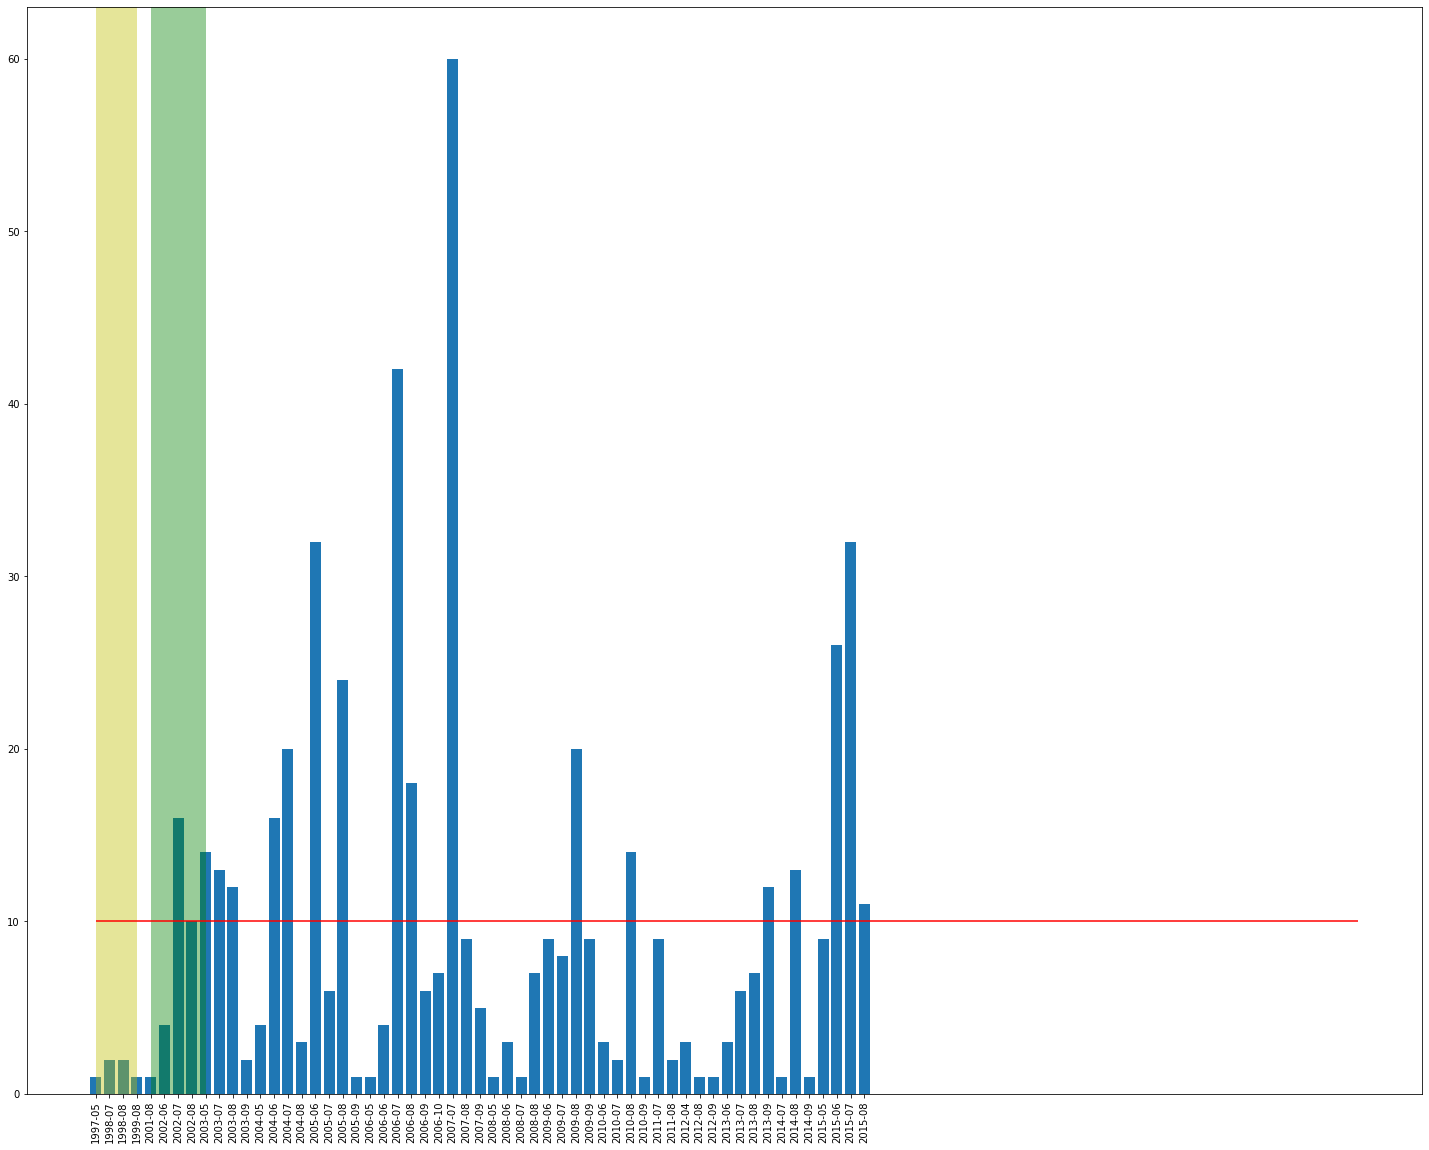

In [64]:
# References:
#     Shading an area between two points in a matplotlib plot:
#         - https://stackoverflow.com/questions/3681872/shading-an-area-between-two-points-in-a-matplotlib-plot


x_axis = np.arange(len(test_YearMonth_df))

plt.figure(figsize = (25,20))
plt.bar(x_axis, test_YearMonth_df["number_of_strikes"])
plt.xticks(x_axis, test_YearMonth_df["YearMonth"], rotation = "vertical")
plt.hlines(10,0,92, alpha = 1, color = "red")
plt.axvspan(0, 3, color='y', alpha=0.4, lw=0) # Highlighting the 1992 Lightning Strikes
plt.axvspan(4, 8, color='g', alpha=0.4, lw=0) # Highlighting the 1993 Lightning Strikes

In [ ]:
# # https://www.edureka.co/community/53559/how-get-all-options-dropdown-using-python-selenium-webdriver

# lghtnng_strks = driver.find_element_by_id("dateSelect")

# options = [x for x in lghtnng_strks.find_elements_by_tag_name("option")]

# print(options)

# for element in options:
#     print (element.get_attribute("text").split(" "))

In [ ]:
# References:
#     - Get All the Options in the Dropdown List:
#         - https://www.edureka.co/community/53559/how-get-all-options-dropdown-using-python-selenium-webdriver
#     - Remove a List of Unwanted Characters from a String:
#         - https://www.geeksforgeeks.org/python-removing-unwanted-characters-from-string/

lghtnng_strks_df = pd.DataFrame()

lghtnng_strks = driver.find_element_by_id("dateSelect")

options = [x for x in lghtnng_strks.find_elements_by_tag_name("option")]

bad_chars = ['(', 'events)']

for element in options:
#     print (element.get_attribute("text"))
    text = element.get_attribute("text")
    
    count = 1
    
    for i in bad_chars:
        text = text.replace(i, "")
        
        if count == 2:
            text = text.replace(i, "")
            print (text.split())
            print (text.split()[0])
            print (text.split()[1])
            print ("**************************")
            count = 0
            
            lghtnng_strks_df = lghtnng_strks_df.append({"date": text.split()[0], 
                                                        "number_of_strikes": text.split()[1]}, ignore_index = True)
            
        count = 1 + count

In [ ]:
lghtnng_strks_df

In [ ]:
def select_dropdown_value(year):
    # https://stackoverflow.com/questions/7867537/how-to-select-a-drop-down-menu-value-with-selenium-using-python
    driver.find_element_by_xpath("//select[@id='yearSelect']/option[text()='2001']").click()

In [ ]:
# https://pythonspot.com/selenium-textbox/

text_area = driver.find_element_by_class_name('esri-input esri-search__input')
text_area.send_keys("This text is send using Python code.")

In [ ]:
# https://stackoverflow.com/questions/52873433/python-selenium-clicking-based-on-alt-attribute

driver.find_element_by_css_selector('[alt="id"]').click()

In [ ]:
# Press/Click a Button Without an ID
#     - https://stackoverflow.com/questions/8871654/how-to-press-click-the-button-using-selenium-if-the-button-does-not-have-the-id

lst_all_statns = '//input[@type="radio" and @value="statelist"]'

button = driver.find_element_by_xpath(lst_all_statns)
button.click()

In [ ]:
# https://stackoverflow.com/questions/7867537/how-to-select-a-drop-down-menu-value-with-selenium-using-python

select = Select(driver.find_element_by_id('select_display'))

# Select by visible text
# select.select_by_visible_text('Daily Stage and Streamflow')

# Select by value text
select.select_by_value('dailystagedischarge')

# ========================================
#  Combine the Streamflow Dataframe with Lightning Dataframe
# ========================================

In [82]:
mnth_lngth_df.head()
mnth_lngth_df = mnth_lngth_df.reset_index(drop = False)
mnth_lngth_df["date"] = mnth_lngth_df["date"].astype(object)
print(mnth_lngth_df.dtypes)
mnth_lngth_df

index                           int64
date                           object
strms_blw_extndd_wghtd_avg    float64
dtype: object


,index,date,strms_blw_extndd_wghtd_avg
0,0,1997-01,9.079257
1,1,1997-02,11.851520
2,2,1997-03,5.375434
3,3,1997-04,1.763397
4,4,1997-05,0.563885
...,...,...,...
223,223,2015-08,43.084198
224,224,2015-09,44.911618
225,225,2015-10,56.129587
226,226,2015-11,56.625477


In [106]:
# Reference:
#   - Export dataframe as csv file from google colab to google drive
#     - https://stackoverflow.com/questions/53898836/export-dataframe-as-csv-file-from-google-colab-to-google-drive/60733479

mnth_lngth_df.to_csv("/content/gdrive/My Drive/Colab_Notebooks/USGS_Idaho_Water_Watch_Data/mnth_strmflw_df.csv")

In [98]:
test_YearMonth_df_test = test_YearMonth_df.rename(columns={"YearMonth": "date"})
# test_YearMonth_df_test["date"] = pd.to_datetime(test_YearMonth_df_test["date"], format='%Y%b') 
print(test_YearMonth_df_test.dtypes)
test_YearMonth_df_test.head()

date                 object
number_of_strikes     int32
dtype: object


,date,number_of_strikes
0,1997-05,1
1,1998-07,2
2,1998-08,2
3,1999-08,1
4,2001-08,1


In [107]:
# Reference:
#   - Export dataframe as csv file from google colab to google drive
#     - https://stackoverflow.com/questions/53898836/export-dataframe-as-csv-file-from-google-colab-to-google-drive/60733479

test_YearMonth_df.to_csv("/content/gdrive/My Drive/Colab_Notebooks/USGS_Idaho_Water_Watch_Data/mnthl_lghtnng_strk_df.csv")

In [105]:
print(mnth_lngth_df.dtypes)
print("****************************")
print(test_YearMonth_df.dtypes)

strmflw_lghtnng_merged_df = pd.merge(mnth_lngth_df, test_YearMonth_df, how="outer", on="date")
strmflw_lghtnng_merged_df

index                           int64
date                           object
strms_blw_extndd_wghtd_avg    float64
dtype: object
****************************
date                 object
number_of_strikes     int32
dtype: object


TypeError: ignored

# +++++++++++++++++++++++++++++++++++++++

# ========================================

# Step 3 - Get the Mean Streamflow Rate for Each Station

# ========================================

## Scrape a webpage and create a BeautifulSoup object from the results

## 3.1 USGS' Science for a Changing World

In [ ]:
# input_fle_dict = {"Station_Nmbr":[], "File_Name": [], "df_Name": [], "Data": [], "Avg_Streamflow": []}

input_fle_dict["Data"][1]

In [ ]:
# input_fle_dict["Data"][0]["streamflow_rate"].mean(axis = 0)
statn_data_lst_of_dicts[0]["Data"]["streamflow_rate"].mean(axis = 0)

In [ ]:
input_fle_dict["Station_Nmbr"]

In [ ]:
# Find the index of a dictionary within a list (I modified this codes since my dictionary isn't in a list)
#     - https://stackoverflow.com/questions/4391697/find-the-index-of-a-dict-within-a-list-by-matching-the-dicts-value

def find_avg (lst, key, value):
    for i, a_dict_2 in enumerate(lst):
        print(a_dict_2[key])
    #         print(input_fle_dict["Station_Nmbr"])
    #         print("********************************************************************")
#         if a_dict_2[key] == value:    
#         if station == value:
#             print(i)
    
                
    
#             avg_strmflw_rte = dict_nm["Data"][i]["streamflow_rate"].mean(axis = 0)
#             dict_nm["Avg_Streamflow"][i].append(avg_strmflw_rte )

#             avg_strmflw = lst[i]["Data"]["streamflow_rate"].mean(axis = 0)
#             lst[i].update({"Avg_Streamflow": avg_strmflw})
        
#             return i # avg_strmflw_rte
    #             print("********************************************************************")
        return -1

In [ ]:
input_fle_dict["Station_Nmbr"][0].append(10)

In [ ]:
find_avg(statn_data_lst_of_dicts, "Station_Nmbr", "13206000")

In [ ]:
lst = [{'id':'1234','name':'Jason'}, {'id':'2345','name':'Tom'}, {'id':'3456','name':'Art'}]

tom_index = next((index for (index, d) in enumerate(lst) if d["name"] == "Tom"), None)
tom_index

# tom_index = next((index for (index, d) in enumerate(input_fle_dict) if d["Station_Nmbr"] == 13075910), None)
# print(tom_index)

In [ ]:
types1 = [type(k) for k in input_fle_dict["Station_Nmbr"]]
types1
# type(13075000)

In [ ]:
dicts = [{'id':'1234','name':'Jason'},
         {'id':'2345','name':'Tom'},
         {'id':'3456','name':'Art'}]

def find_index(dicts, key, value):
    class Null: pass
    for i, d in enumerate(dicts):
        if d.get(key, Null) == value:
            return d
    else:
        raise ValueError('no dict with the key and value combination found')

print (find_index(dicts, 'name', 'Tom'))
# 1
# find_index(dicts, 'name', 'Ensnare')
# ValueError: no dict with the key and value combination found

In [ ]:
dicts

In [ ]:
def find(lst, key, value):
#     i = 0
    for i, dic in enumerate(lst):
        print(lst)
        print(dic)
        print("********************************************************************")
        if dic[key] == value:
            return i
            print("********************************************************************")
    return -1


In [ ]:
find(lst, "name", "Tom")

In [ ]:
# Using list comprehension + enumerate() 
# Key index in Dictionary 
search_key = "13075000"

temp = list(input_fle_dict.items())  Station_Nmbr
res = list(input_fle_dict.keys()).index(search_key) 
res

In [ ]:
for input_fle_nm in input_fle_dict["File_Name"]:
    
# Using list comprehension + enumerate() 
# Key index in Dictionary 
    temp = list(test_dict.items())  
    res = [idx for idx, key in enumerate(temp) if key[0] == search_key] 
    
    
    input_fle_dict["Data"][0]["streamflow_rate"] = input_fle_dict["Data"][0]["streamflow_rate"].mean(axis = 0)

# +++++++++++++++++++++++++++++++++++++++

In [ ]:
file = open("Data/Idaho_Streamflow_Data/13206000.txt", "r")
lines = file.readlines()[26:]

print(type(lines))
print(lines)

pd.DataFrame(lines)

In [ ]:
# Delete a Row from the List
#     - https://note.nkmk.me/en/python-list-clear-pop-remove-del/#:~:text=In%20Python%2C%20use%20list%20methods,with%20an%20index%20or%20slice.

del lines[0:1]
lines
# print((lines[1].split("\t")))
test = lines[1][:-1].split("\t")
test

a_series = pd.Series(test, index = clmn_nms)
_13206000_df = _13206000_df.append(a_series, ignore_index=True)
_13206000_df

In [ ]:
# Read in the Text File and Convert to a Dataframe
data = pd.read_csv('Data/Idaho_Streamflow_Data/13206000.txt')
data

In [ ]:
# Drop the Empty Rows
import numpy as np
np.where(pd.isnull(statn_table_df_splt_StatnNmbr_nmbrs_clmn))
# statn_table_df_splt_StatnNmbr_nmbrs_clmn.isnull()

In [ ]:
statn_table_df["StationNumber"] = statn_table_df["StationNumber"].astype(str)
print(statn_table.dtypes)

In [ ]:
    if "County" in statn_table["StationNumber"][0]:
        print("true")
        statn_table_df_drp_cnty = statn_table_df.drop([0, 4], axis = 0)
statn_table_df_drp_cnty

In [ ]:
# Delete the County Names from the Table
# test = statn_table.drop([0, 4], axis = 0)
# test.head()

# Count the number of Rows in the Dataframe
count = 0
for statn_table_df_row in statn_table_df.index:

    if "County" in statn_table_df["StationNumber"][statn_table_df_row]:
        statn_table_df_drp_cnty = statn_table_df.drop([statn_table_df_row], axis = 0)
        count = count + 1

print(count)


In [ ]:
statn_table_df_drp_cnty.head(15)
# statn_table_df_drp_cnty.tail(15)

In [ ]:
print(statn_table_df_row)

In [ ]:
statn_table_df["StationNumber"].value_counts()

In [ ]:
# Grab All Page Source on the Page
soup_lxml = BS(driver.page_source, "lxml")

# Find All the Tables on the Page
tables = soup_lxml.find_all("table")
tables

In [ ]:
# Read the Tables with Pandas
dfs = pd.read_html(str(tables))

In [ ]:
# Access the Table
print(f"Number of Tables on the page: {len(dfs)}")
print("*********************************************************************************************************")
print(f"Data Types for the Table: {dfs[11].dtypes}")
print("*********************************************************************************************************")
print(f"Number of Rows in the dataframe: {len(dfs[11])}")
dfs[11].head()

In [ ]:
print(dfs[11]["USGSstationnumber"].value_counts())

In [ ]:
# Press/Click a Button Without an ID
#     - https://stackoverflow.com/questions/8871654/how-to-press-click-the-button-using-selenium-if-the-button-does-not-have-the-id

# Select(driver.find_element_by_id('rdb'))

tab_sprtd_rado = '//input[@type="radio" and @value="rdb"]'

button = driver.find_element_by_xpath(tab_sprtd_rado)
button.click()

In [ ]:
# identify location of chromedriver and store it as a variable
chromedriver = !which chromedriver
print(type(chromedriver))
chromedriver[0]

### 2.1.1 Retrieve the data/information on USGS' WaterWatch website

In [ ]:
# Retrieve page with the requests module
executable_path = {"executable_path": "chromedriver"}
# OR
# executable_path = {"executable_path": chromedriver[0]}
# I am not sure why the above works and the below statement will not. I think it's b/c chromebriver is a class 'IPython.utils.text.SList'?
# executable_path = {"executable_path": chromedriver}

browser = Browser('chrome', **executable_path, headless = False)

In [ ]:
# URL of page to be scraped
url = "https://waterwatch.usgs.gov/index.php?id=wwdrought"
# url = "https://www.usgs.gov/"
browser.visit(url)
window = browser.windows.current

In [ ]:
html = browser.html
soup = BS(html, "html.parser")

In [ ]:
type(soup)

In [ ]:
# Print the html code of the NASA's Mars website
print(soup.prettify())

In [ ]:
# https://stackoverflow.com/questions/19392466/python-beautifulsoup-get-select-value-not-text

for option in soup.find_all('option'):
    print(option)

In [ ]:
# https://stackoverflow.com/questions/7867537/how-to-select-a-drop-down-menu-value-with-selenium-using-python

select = Select(driver.find_element_by_id('st'))

# Select by visible text
select.select_by_visible_text('Idaho')

In [ ]:
# Fill in Input Fills
#     - https://stackoverflow.com/questions/25537567/how-to-open-website-and-fill-in-input-using-selenium-webdriver
# Clear the Input Field
#     - http://10minbasics.com/clear-fill-input-field-with-selenium/

element = driver.find_element_by_name("bdt")
element.clear()
element.send_keys("1990-01-01")

element = driver.find_element_by_name("edt")
element.clear()
element.send_keys("1990-12-31")

In [ ]:
# Press/Click a Button Without an ID
#     - https://stackoverflow.com/questions/8871654/how-to-press-click-the-button-using-selenium-if-the-button-does-not-have-the-id

NEXT_BUTTON_XPATH = '//input[@type="submit" and @value="GO"]'

button = driver.find_element_by_xpath(NEXT_BUTTON_XPATH)
button.click()

In [ ]:
# https://stackoverflow.com/questions/5041008/how-to-find-elements-by-class

# test = soup.find_all("div", class_= "ztable")
# test

# https://stackoverflow.com/questions/20522820/how-to-get-tbody-from-table-from-python-beautiful-soup
soup.findAll('table')[0].findAll('tr')

In [ ]:
# Grab All Page Source on the Page
soup_lxml = BS(driver.page_source, "lxml")

# Find All the Tables on the Page
tables = soup_lxml.find_all("table")
tables

In [ ]:
# Read the Tables with Pandas
dfs = pd.read_html(str(tables))

In [ ]:
# Access the Table
print(f"Number of Tables on the page: {len(dfs)}")
print("*********************************************************************************************************")
print(f"Data Types for the Table: {dfs[11].dtypes}")
print("*********************************************************************************************************")
print(f"Number of Rows in the dataframe: {len(dfs[11])}")
dfs[11].head()

In [ ]:
print(dfs[11]["USGSstationnumber"].value_counts())

In [ ]:
import requests, json
text = requests.get("https://waterwatch.usgs.gov/index.php?id=wwdrought").text
data = json.loads(text)
print(data['Scty'])

In [ ]:
for tr in soup.find_all('tr')[2:]:
    tds = tr.find_all('td')
    print (tds)#"Nome: %s, Cognome: %s, Email: %s" % \
#           (tds[0].text, tds[1].text, tds[2].text)

# ========================================

# Step 1 - Scraping

# ========================================

# ========================================

# Step 1 - Scraping

# ========================================

### 1.1.2 Scrape the [NASA Mars News Site](https://mars.nasa.gov/news/) and collect the latest News Title and Paragraph Text. Assign the text to variables that you can reference later.

#### 1.1.2.1 Collect the latest News Title